In [271]:
import pandas as pd
import dateutil.parser

In [272]:
df = pd.read_csv('../Created CSVs/all_seins_all_data_standard_dates.csv')

In [273]:
df['Date'] =  [dateutil.parser.parse(date) for date in list(df['Date'])]

In [274]:
sal_df = df[['Date', 'Salinity']]

In [275]:
sal_df = sal_df.dropna()

In [276]:
sal_df = sal_df[sal_df.Salinity.str.contains(r'\d') == True]

In [277]:
sal_df = sal_df.drop_duplicates()

In [278]:
import re

In [279]:
salinity = []
for sal in sal_df['Salinity']:
    first_num  = re.search(r'\d+', sal).group()
    salinity.append(first_num)
    

In [280]:
sal_df['Salinity'] = [int(x) for x in salinity]

In [281]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [282]:
sal_df = sal_df.set_index('Date')

In [283]:
sal_df = sal_df[sal_df['Salinity'] > 1]

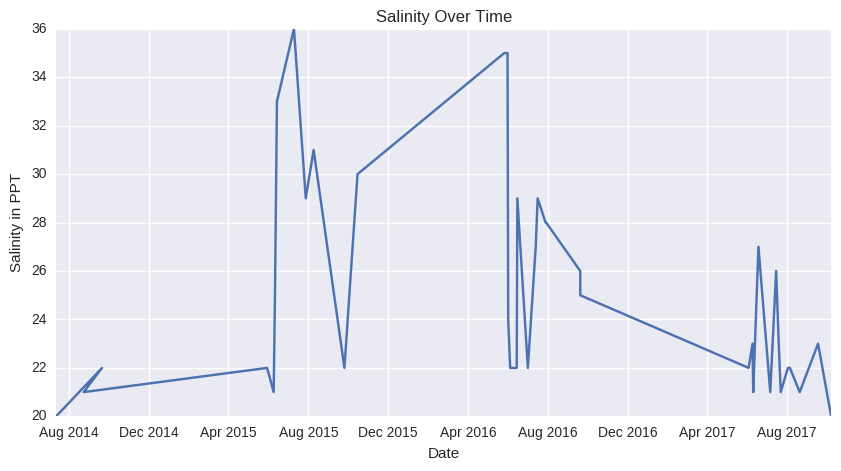

In [284]:
plt.figure(figsize=(10,5))
plt.title('Salinity Over Time')
plt.ylabel('Salinity in PPT')
plt.xlabel('Date')
plt.plot(sal_df)
plt.savefig('../Graphs/Salinity_Graph')

In [285]:
sal_df.index

DatetimeIndex(['2014-07-12', '2014-09-20', '2014-08-23', '2015-05-30',
               '2015-06-09', '2015-06-11', '2015-06-14', '2015-07-10',
               '2015-07-28', '2015-08-09', '2015-09-25', '2015-10-15',
               '2016-05-26', '2016-05-31', '2016-06-01', '2016-06-04',
               '2016-06-14', '2016-06-15', '2016-07-01', '2016-07-13',
               '2016-07-16', '2016-07-28', '2016-07-29', '2016-09-19',
               '2016-09-19', '2017-06-03', '2017-06-09', '2017-06-10',
               '2017-06-18', '2017-07-06', '2017-07-15', '2017-07-19',
               '2017-07-22', '2017-08-02', '2017-08-05', '2017-08-20',
               '2017-09-17', '2017-10-07'],
              dtype='datetime64[ns]', name=u'Date', freq=None)

In [286]:
sal_df['Date'] = sal_df.index

In [287]:
sal_df['Year'] =  [x.year for x in sal_df['Date']]

In [288]:
sal_by_year = sal_df.groupby('Year')

In [289]:
sal2014 = sal_by_year.get_group(2014)['Salinity']

In [290]:
sal2014 = sal2014.sort_index()

In [291]:
sal2015 = sal_by_year.get_group(2015)['Salinity']

In [292]:
sal2016 = sal_by_year.get_group(2016)['Salinity']

In [293]:
sal2017 = sal_by_year.get_group(2017)['Salinity']

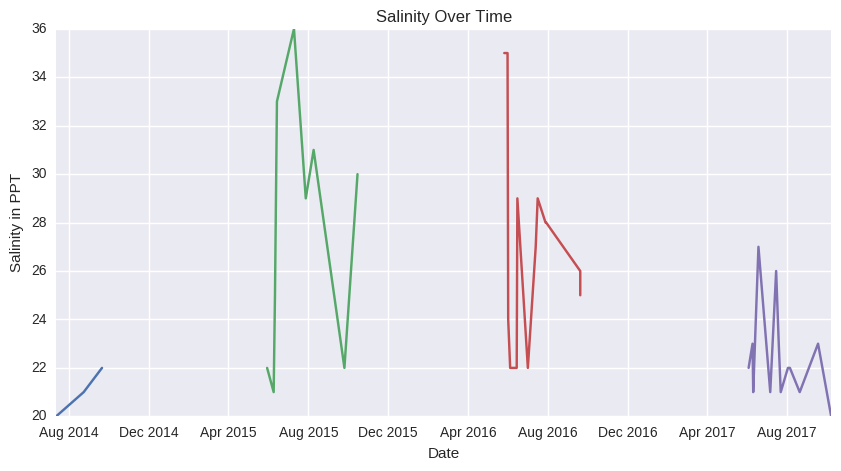

In [294]:
plt.figure(figsize=(10,5))
plt.title('Salinity Over Time')
plt.ylabel('Salinity in PPT')
plt.xlabel('Date')
plt.plot(sal2014)
plt.plot(sal2015)
plt.plot(sal2016)
plt.plot(sal2017)
plt.savefig('../Graphs/Salinity_Graph')

In [295]:
sal2014.index = [x.dayofyear for x in sal2014.index]
sal2015.index = [x.dayofyear for x in sal2015.index]
sal2016.index = [x.dayofyear for x in sal2016.index]
sal2017.index = [x.dayofyear for x in sal2017.index]


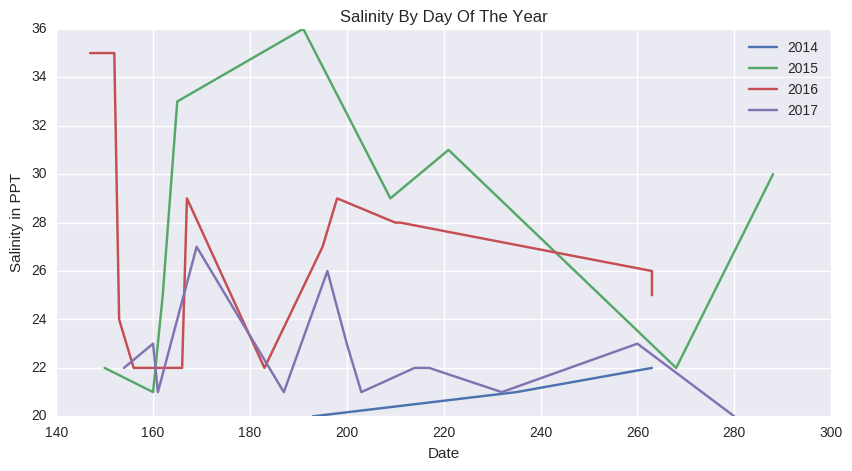

In [325]:
plt.figure(figsize=(10,5))
plt.title('Salinity By Day Of The Year')
plt.ylabel('Salinity in PPT')
plt.xlabel('Date')
plt.plot(sal2014)
plt.plot(sal2015)
plt.plot(sal2016)
plt.plot(sal2017)
plt.legend(['2014', '2015', '2016', '2017'], loc='upper right')
plt.savefig('../Graphs/Salinity_Graph_Year_Comparison')

In [297]:
conditions = df[['Date','DO', 'pH', 'Salinity', 'Turbidity', 'Water Temp:', 'Weather & Air Temp:']].drop_duplicates()

In [298]:
import numpy as np

In [299]:
def fix_ph(pH_li):
    pH_list  = []
    pH_li = pH_li.fillna('')
    pH_lists  = [re.findall('\d+\.*', x ) for x in pH_li]

    for pH in pH_lists:
        if len(pH) == 0:
            pH_list.append(np.NaN)
        elif len(pH) ==  1:
            pH_list.append(pH[0])
            #print pH[0]
        elif pH[0][-1] == '.':
            pH_list.append(pH[0]+pH[1])
            #print pH[0]+pH[1]
        else:
            pH_list.append(pH[0])
            #print 'bad',pH[1], pH
    #pHCompare['pH'] = pH_list
    return [float(x) for x in pH_list]

In [300]:
conditions['pH'] = fix_ph(conditions['pH'])

In [301]:
def fix_water_temp(h20_temp_list):
    water_temp_list = []
    h20_temp_list = h20_temp_list.fillna('')
    h20_temp_list  = [re.findall('\d+\.*', x ) for x in h20_temp_list]
    for temp in h20_temp_list:
        #print temp
        if len(temp) == 0:
            water_temp_list.append(np.NaN)
        elif len(temp) ==  1:
            if int(temp[0]) < 30:
                new_temp = int(temp[0]) * 9.0/5 + 32
                water_temp_list.append(str(new_temp))
            else:
                water_temp_list.append(temp[0])
            #print pH[0]
        elif temp[0][-1] == '.':
            water_temp_list.append(temp[0]+temp[1])
            #print pH[0]+pH[1]
        else:
            water_temp_list.append(temp[0])
    
    return [float(x) for x in water_temp_list]

In [302]:
conditions['Water Temp:'] = fix_water_temp(conditions['Water Temp:'])

In [303]:
def clean_salinity(sal_list):
    salinity = []
    for sal in sal_list:
        if sal != sal:
            salinity.append(sal)
        elif any(char.isdigit() for char in sal) == False:
            salinity.append(np.NAN)
        else:
            first_num  = re.search(r'\d+', sal).group()
            salinity.append(first_num)
    return [float(x) for x in salinity]

In [304]:
conditions['Salinity'] = clean_salinity(conditions['Salinity'])

In [305]:
temp_sal = conditions[['Water Temp:', 'Salinity']].dropna().drop_duplicates()

In [306]:
temp_sal['Water Temp:']= [float(x) for x in temp_sal['Water Temp:']]
temp_sal['Salinity']= [float(x) for x in temp_sal['Salinity']]

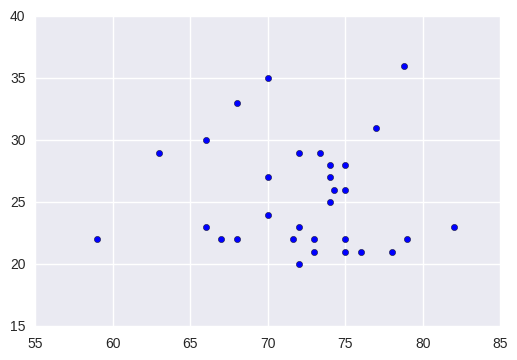

In [307]:
plt.scatter(temp_sal['Water Temp:'], temp_sal['Salinity'])

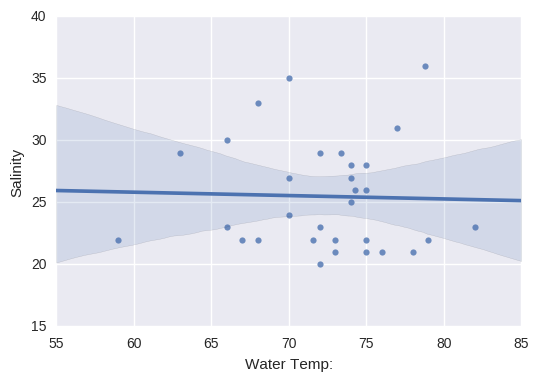

In [308]:
sns.regplot(temp_sal['Water Temp:'], temp_sal['Salinity'])

In [309]:
def clean_DO(DO_list):
    cleaned_list = []
    DO_list = DO_list.fillna('')
    DO_list  = [re.findall('\d+\.*', x ) for x in DO_list]

    for DO in DO_list:
        if len(DO) == 0:
            cleaned_list.append(np.NaN)
        else:
            cleaned_list.append(int(DO[0]))
       
    return cleaned_list
    

In [310]:
conditions['DO'] = clean_DO(conditions['DO'])

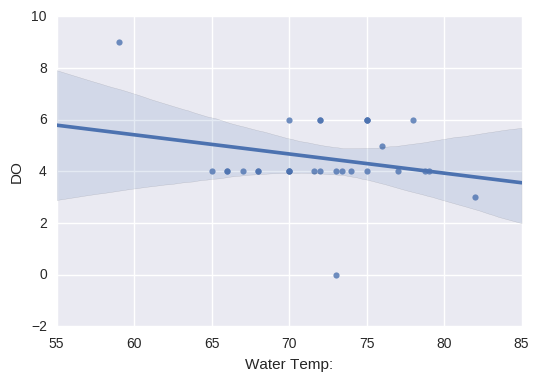

In [311]:
sns.regplot(conditions['Water Temp:'], conditions['DO'])

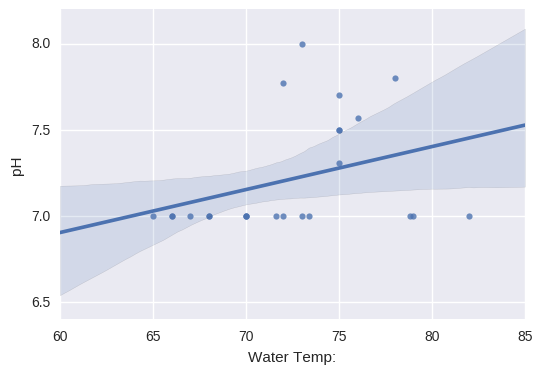

In [314]:
sns.regplot(conditions['Water Temp:'], conditions['pH'])

In [313]:
conditions.corr()

,DO,pH,Salinity,Water Temp:
DO,1.000000,0.163730,-0.013284,-0.243434
pH,0.163730,1.000000,-0.072375,0.340480
Salinity,-0.013284,-0.072375,1.000000,-0.072051
Water Temp:,-0.243434,0.340480,-0.072051,1.000000


In [315]:
conditions

,Date,DO,pH,Salinity,Turbidity,Water Temp:,Weather & Air Temp:
0,2008-09-13,NaN,NaN,NaN,NaN,NaN,NaN
17,2009-06-20,NaN,NaN,NaN,NaN,NaN,NaN
29,2009-09-23,NaN,NaN,NaN,NaN,NaN,NaN
34,2010-06-12,NaN,NaN,NaN,NaN,NaN,NaN
43,2010-06-26,NaN,NaN,NaN,NaN,NaN,NaN
48,2010-07-07,NaN,NaN,NaN,NaN,NaN,NaN
50,2010-07-08,NaN,NaN,NaN,NaN,NaN,NaN
57,2010-07-09,NaN,NaN,NaN,NaN,NaN,NaN
68,2010-07-10,NaN,NaN,NaN,NaN,NaN,NaN
78,2010-07-20,NaN,NaN,NaN,NaN,NaN,NaN
